In [1]:
# Import necessary libraries
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, confusion_matrix # type: ignore

%matplotlib inline

In [2]:
# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
df = pd.read_csv(url)

In [4]:
# Select relevant features and target variable
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
df['churn'] = df['churn'].astype(int)  # Ensure target variable is integer

In [5]:
# Display the first few rows of the dataset
df.head()

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0


In [6]:
# Prepare feature matrix (X) and target variable (y)
X = df.drop(columns=['churn']).values  # Feature matrix
y = df['churn'].values  # Target variable

In [7]:
# Standardize feature values
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

In [9]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)  # Predicted labels
y_pred_prob = model.predict_proba(X_test)  # Predicted probabilities

In [11]:
# Extract coefficients
coefficients = pd.Series(model.coef_[0], index=df.columns[:-1])

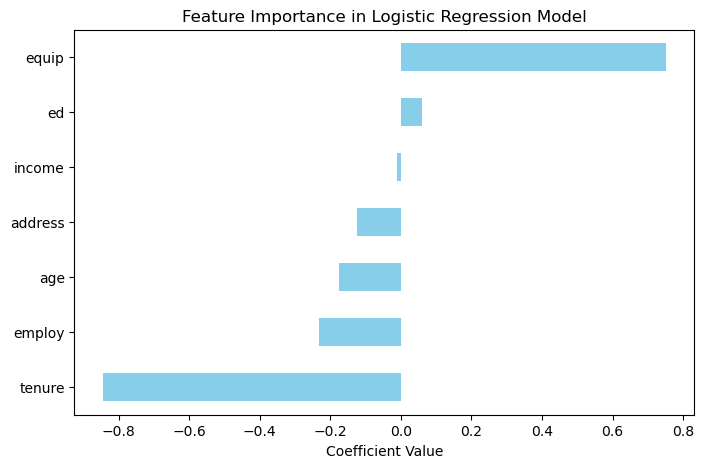

In [12]:
# Plot feature importance
coefficients.sort_values().plot(kind='barh', figsize=(8, 5), color='skyblue')
plt.title("Feature Importance in Logistic Regression Model")
plt.xlabel("Coefficient Value")
plt.show()

In [13]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_prob)

In [14]:
# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Log Loss: {logloss:.4f}")

Accuracy: 0.7250
Precision: 1.0000
Recall: 0.2667
Log Loss: 0.6258


In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[25  0]
 [11  4]]


In [21]:
# Input new data for prediction using a Pandas DataFrame
new_data = pd.DataFrame({
    'tenure': [5],          # Example: tenure = 12 months
    'age': [25],             # Example: age = 40 years
    'address': [10],          # Example: address length = 5 years
    'income': [200000],      # Example: income = $100,000
    'ed': [5],               # Example: education level = 4
    'employ': [7],           # Example: employment length = 3 years
    'equip': [1]             # Example: equipment = 1 (yes)
})

In [22]:
# Standardize the new data using the same scaler
new_data_norm = scaler.transform(new_data)

C:\Users\AbdulQadir\.conda\envs\datascience\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [23]:
# Predict churn probability for the new data
new_pred_prob = model.predict_proba(new_data_norm)
new_pred = model.predict(new_data_norm)

In [24]:
# Display the prediction
print("\nNew Data Prediction:")
print(f"Probability of Churn (Class 1): {new_pred_prob[0][1]:.4f}")
print(f"Predicted Class: {new_pred[0]}")


New Data Prediction:
Probability of Churn (Class 1): 0.0000
Predicted Class: 0
